In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import re

from sklearn.decomposition import PCA,SparsePCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

DIMENSION REDUCTION WOOO.ipynb  get squares.ipynb
Dimension Reduction/            highschools.json
Untitled Folder/                homepage.html
combine data.ipynb              old files - ignore/
crime pca.ipynb                 pca_zillow.ipynb
data collection/                seattle.json
feature engineering/


In [5]:
df = pd.read_csv('data collection/demographics_final.csv')
ids = df.id_y
names = df.name
#df = df[df.columns[:75]]

In [915]:
mask = (df.dtypes == np.float64) | (df.dtypes == np.int)
df_sub = df.ix[:, mask]
df_sub = df_sub.dropna(axis = 1, thresh = 60)
df_sub = df_sub.fillna(0)
a = df_sub.apply(lambda s : s.value_counts().get(0,0), axis=0)
a = a[a < 10].index


In [916]:
df_sub = df_sub[a]
df_sub = df_sub.replace(0, df.median())

In [996]:
pca = SparsePCA(n_components = 3)
imp = preprocessing.Imputer(axis=0)
X = imp.fit_transform(df_new)
X_centered = preprocessing.scale(X)
X_pca = pca.fit_transform(X_centered)
#print(pca.explained_variance_ratio_)


In [988]:
df_c = pd.DataFrame(pca.components_.T, index = df_new.columns, columns = [1,2,3])

In [952]:
#df_c['size'] = np.sqrt(df_c[1]**2 + df_c[2]**2 + df_c[3]**2)

In [992]:
df_c.sort(3, ascending = False)

,1,2,3
"['Census Summary-AgeDecade: >=70s', 'Census Summary-RelationshipStatus: Widowed-Female']",0.000000,0.000000,5.852328
['Census Summary-AgeDecade: 60s'],0.000000,0.907050,5.533910
['Census Summary-RelationshipStatus: Widowed-Male'],0.000000,0.000000,5.142237
"['Census Summary-AgeDecade: 40s', 'Census Summary-CommuteTime: 20-30min', 'Census Summary-Household: NoKids', 'Census Summary-RelationshipStatus: Divorced-Female', 'Homes & Real Estate Data: Avg Year Built', 'People Data: Average Commute Time (Minutes)', 'People Data: Median Age']",-1.716294,0.000000,4.842824
['BuiltYear: 1940-1959'],3.521373,0.000000,3.805042
['BuiltYear: 1960-1979'],-0.183938,-1.750076,3.187232
"['Census Summary-AgeDecade: 50s', 'Homes & Real Estate Data: Median Home Size (Sq Ft)']",1.547206,5.547578,2.087446
['Census Summary-CommuteTime: 45-60min'],2.677352,-2.982058,1.908358
"['Census Summary-Occupancy: Own', 'Census Summary-RelationshipStatus: Married-Female', 'Census Summary-RelationshipStatus: Married-Male', 'Homes & Real Estate Data: Owners', 'People Data: Median Household Income']",6.181854,0.604743,1.016661
"['Census Summary-HomeType: Condo', 'Homes & Real Estate Data: Condos']",-6.434959,0.009003,0.862910


In [126]:
cols = ['single new condo rent no kids -married owners kids single family homes ', '50s rich big homes - large commute small homes family', 'single 20s30s cheap old small commute - old people widows']

In [693]:
dff = df_sub.fillna(0)
a = dff.apply(lambda s : s.value_counts().get(0,0), axis=0)
a = a[a < 10].index
dff = dff[a]

In [1014]:
for i in [4,5,6,7,8]:
    clusterer = KMeans(n_clusters=i)
    cluster_labels = clusterer.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 4 The average silhouette_score is : 0.311822044128
For n_clusters = 5 The average silhouette_score is : 0.310654047006
For n_clusters = 6 The average silhouette_score is : 0.296453361639
For n_clusters = 7 The average silhouette_score is : 0.309708884093
For n_clusters = 8 The average silhouette_score is : 0.297931942892


In [926]:
df_pca.to_csv('pca_zillow.csv', index = False)

In [981]:
def plot_embedding(X, y, name_list, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(20, 20), dpi=250)
    ax = plt.subplot(111, projection='3d')
    #ax.axis('off')
    #ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 2],X[i,1], str(name_list[i]), color=plt.cm.Set1(y[i] / 10.), fontsize = 10)

    plt.xticks([]), plt.yticks([])
    ax.set_xlim3d(-0.1, 1.1)
    ax.set_ylim3d(-0.1, 1.1)
    ax.set_zlim3d(-0.1, 1.1)
    if title is not None:
        plt.title(title, fontsize=16)

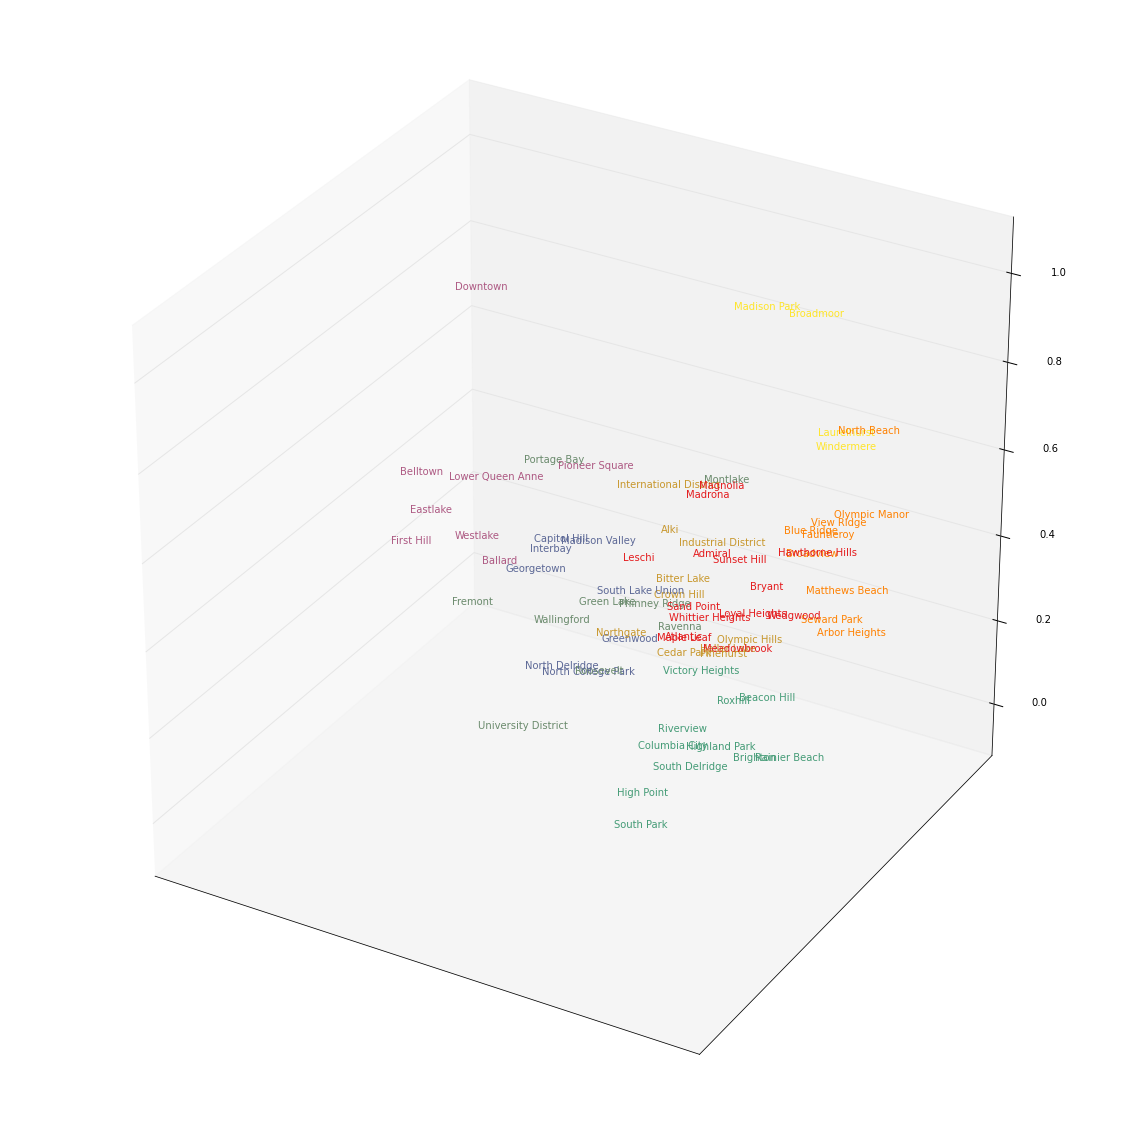

In [1015]:
plot_embedding(X_pca, cluster_labels, names)

In [934]:
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster

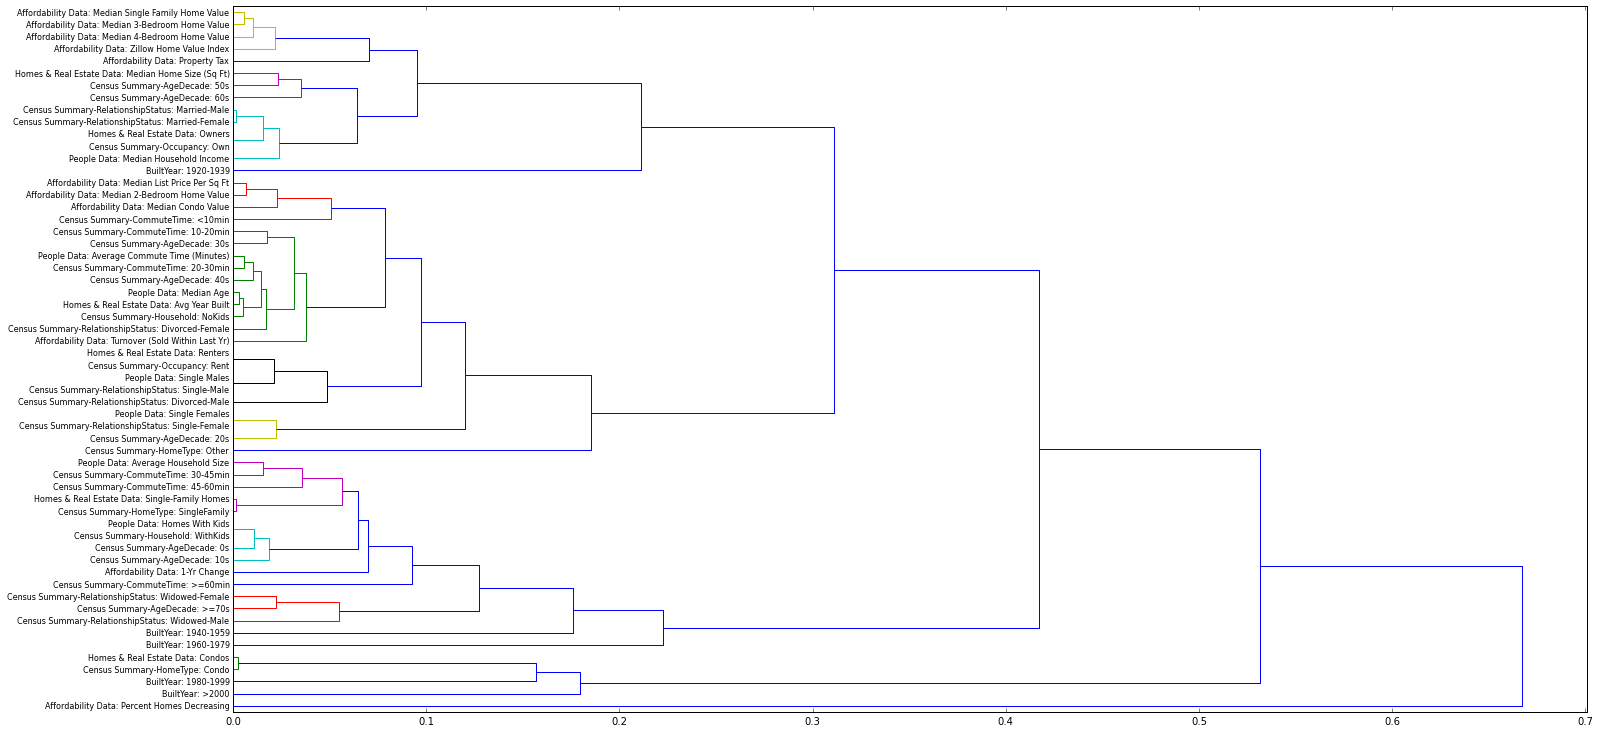

In [969]:
link = linkage(df_sub.T,method='complete', metric = 'cosine')

# 5. Using scipy's dendrogram function plot the linkages as
# a hierachical tree.
plt.figure(figsize=(20,20))
dendro = dendrogram(link, color_threshold=0.06, leaf_font_size=8, labels = df_sub.columns,  orientation = 'left')
plt.subplots_adjust(top=.99, bottom=0.5, left=0.05, right=0.99)
plt.show()

In [970]:
assignments = fcluster(link, .03, 'distance')
d = pd.DataFrame(zip(df_sub.columns,assignments)).groupby(1)[0].aggregate(lambda x: tuple(x))
df_new = pd.DataFrame(index = df_sub.index)
df_sub1 = (df_sub - df_sub.mean()) / (df_sub.max() - df_sub.min())
for i in d:
    ar = []
    for w in i:
        ar.append(w)
    if len(ar) > 1:
        df_new[str(ar)] = df_sub1[ar].sum(axis = 1)
    else:
        ad = df_sub1[ar].values
        df_new[str(ar)] = ad


'Sand Point'

In [704]:
len(df_sub.columns)

25